In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
donor_ex_o = pd.read_csv('Donor_1.csv', index_col =[0])
#donor_ex.columns
donor_ex = donor_ex_o.drop(columns = 'geneID')
donor_ex.head()

,occipital neocortex,primary motor-sensory cortex (samples),amygdaloid complex,medial ganglionic eminence,posterior (caudal) superior temporal cortex (area 22c),upper (rostral) rhombic lip,caudal ganglionic eminence,dorsal thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,dorsolateral prefrontal cortex,orbital frontal cortex,lateral ganglionic eminence,"inferolateral temporal cortex (area TEv, area 20)",hippocampus (hippocampal formation),ventrolateral prefrontal cortex,parietal neocortex
ensembl_gene_id,,,,,,,,,,,,,,,,
ENSG00000000003,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,41.084665,22.177874,23.640053,43.194162,30.133433,26.391215
ENSG00000000005,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,0.635343,0.049313,0.006587,0.163946,0.086484,0.159348
ENSG00000000419,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,29.371442,17.982009,19.390473,26.140231,27.771254,22.094928
ENSG00000000457,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,3.287066,3.602514,3.308546,3.557031,3.135879,3.467244
ENSG00000000460,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,2.804860,2.861844,2.011409,3.774340,2.687870,3.047570


In [3]:
donor_ex_sub = donor_ex.sample(300)
donor_ex_sub.shape

(300, 16)

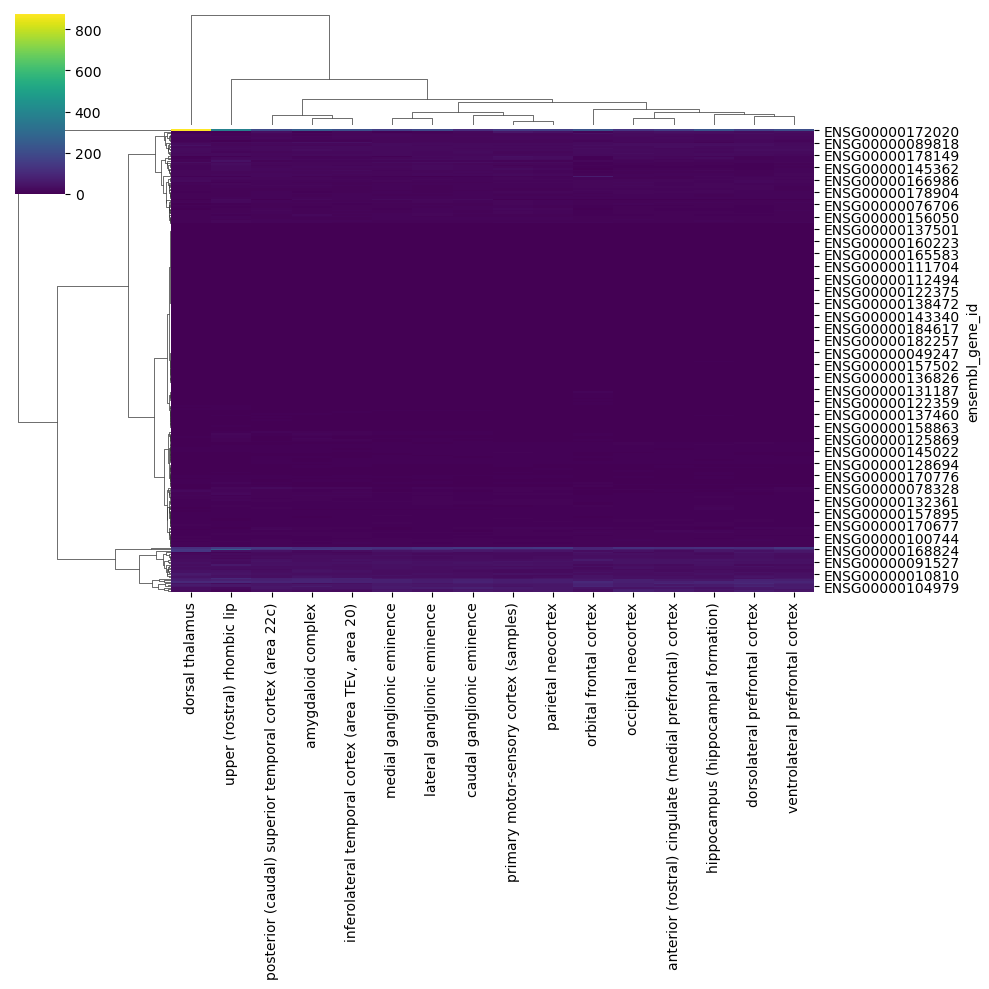

In [4]:


sns.clustermap(donor_ex_sub, cmap="viridis", method="ward", row_cluster=True)
plt.show()



In [5]:
donor_ex.head()

,occipital neocortex,primary motor-sensory cortex (samples),amygdaloid complex,medial ganglionic eminence,posterior (caudal) superior temporal cortex (area 22c),upper (rostral) rhombic lip,caudal ganglionic eminence,dorsal thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,dorsolateral prefrontal cortex,orbital frontal cortex,lateral ganglionic eminence,"inferolateral temporal cortex (area TEv, area 20)",hippocampus (hippocampal formation),ventrolateral prefrontal cortex,parietal neocortex
ensembl_gene_id,,,,,,,,,,,,,,,,
ENSG00000000003,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,41.084665,22.177874,23.640053,43.194162,30.133433,26.391215
ENSG00000000005,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,0.635343,0.049313,0.006587,0.163946,0.086484,0.159348
ENSG00000000419,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,29.371442,17.982009,19.390473,26.140231,27.771254,22.094928
ENSG00000000457,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,3.287066,3.602514,3.308546,3.557031,3.135879,3.467244
ENSG00000000460,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,2.804860,2.861844,2.011409,3.774340,2.687870,3.047570


In [6]:
from sklearn.preprocessing import StandardScaler
features = donor_ex.columns



In [7]:
# Separating out the features
x = donor_ex.loc[:, features].values

# Separating out the target
y = donor_ex_o.loc[:,['geneID']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')

principalComponents = pca.fit_transform(x)
#principalComponents
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,1.207014,-0.541395
1,-0.890762,0.038357
2,0.843881,-0.407344
3,-0.654088,0.008191
4,-0.689574,-0.015246


In [9]:
finalDF = principalDf.copy()
geneIDs = donor_ex_o.loc[:,['geneID']].values
finalDF['ensembl_gene_id'] = geneIDs


finalDF.shape

(16150, 3)

[Text(0.5, 1.0, 'PCA')]

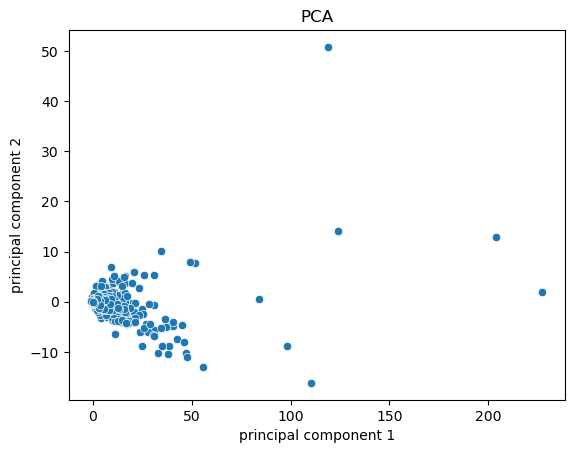

In [10]:
sns.scatterplot(data=finalDF, x="principal component 1", y="principal component 2").set(title='PCA')

In [11]:
pca.explained_variance_ratio_

array([0.94553702, 0.02623038])

In [12]:
'''#Now do Kmeans clustering on donor_ex
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(principalDf) 
    wcss.append(kmeans.inertia_)
'''  


"#Now do Kmeans clustering on donor_ex\nfrom sklearn.cluster import KMeans\nwcss = []\nfor i in range(1, 20): \n    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)\n    kmeans.fit(principalDf) \n    wcss.append(kmeans.inertia_)\n"

In [13]:
'''plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.title("Elbow Plot")
plt.show()'''

'plt.plot(range(1, 20), wcss)\nplt.xlabel(\'Number of clusters\')\nplt.ylabel(\'WCSS\') \nplt.title("Elbow Plot")\nplt.show()'

In [14]:
principalDf.shape

#plt.scatter(principalDf[:,0], principalDf[:,1], c=kmeans.labels_.astype(float))
#plt.show()

(16150, 2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


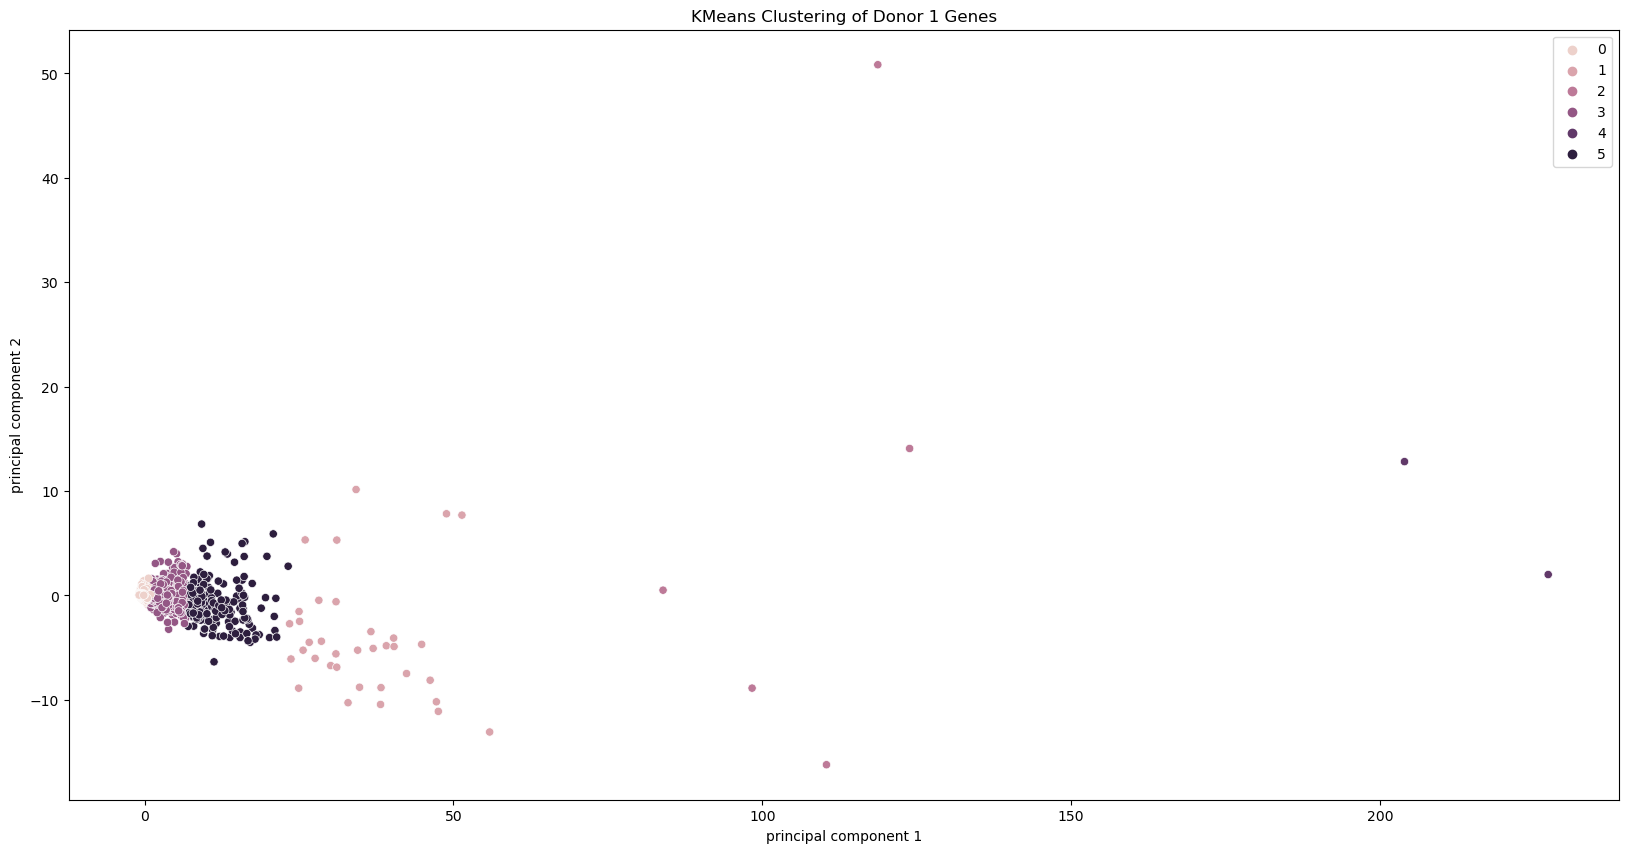

In [15]:
km6 = KMeans(n_clusters=6, random_state=0) 

km6.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km6.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


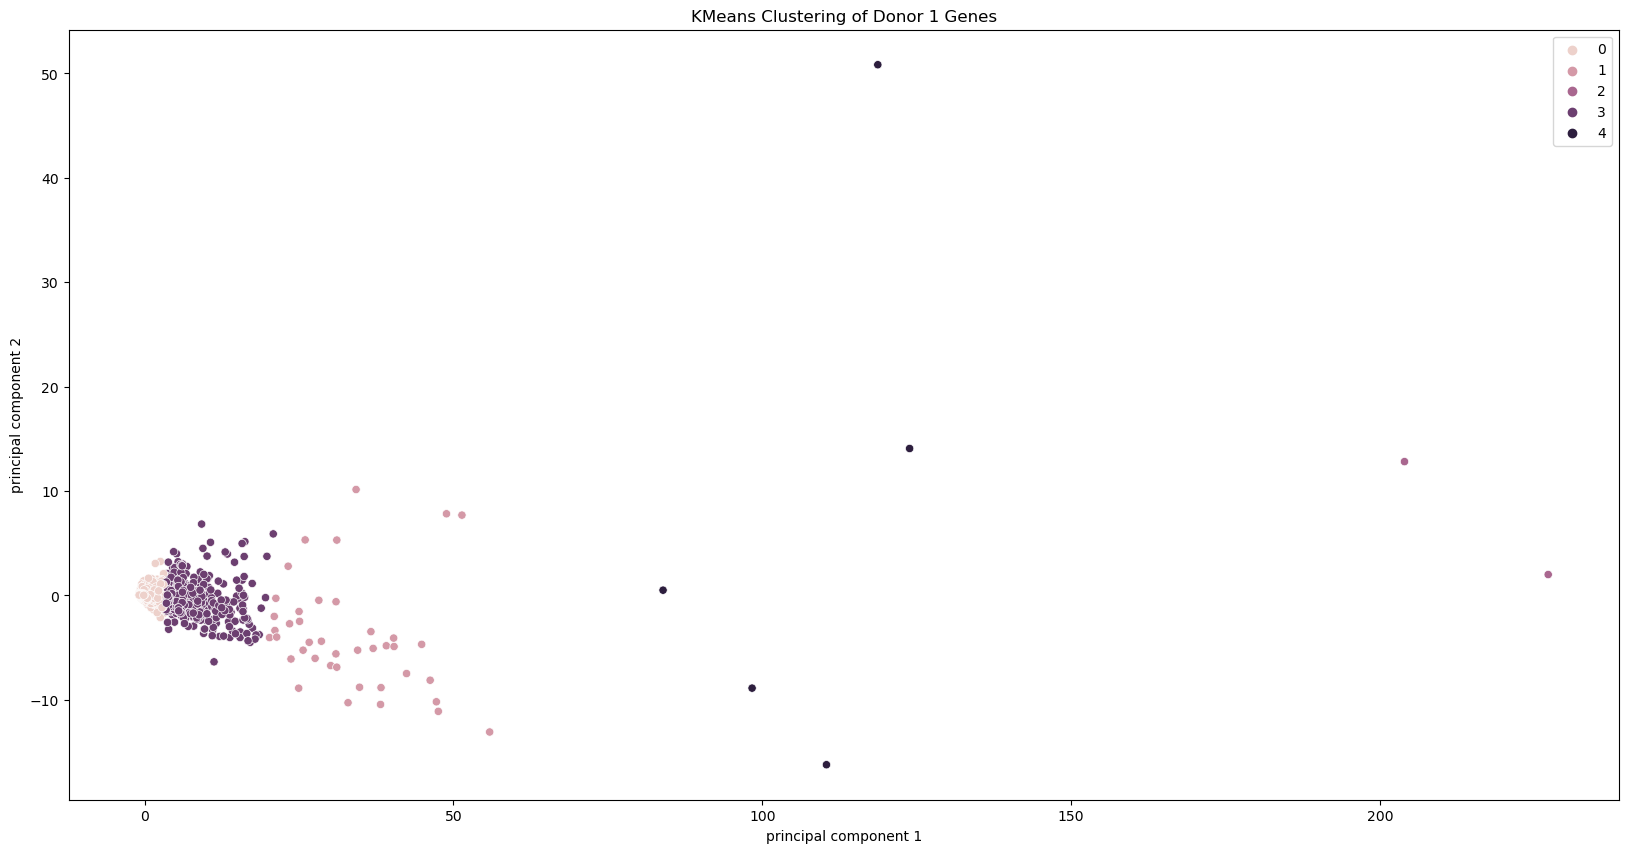

In [16]:
km5 = KMeans(n_clusters=5, random_state=0) 

km5.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km5.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


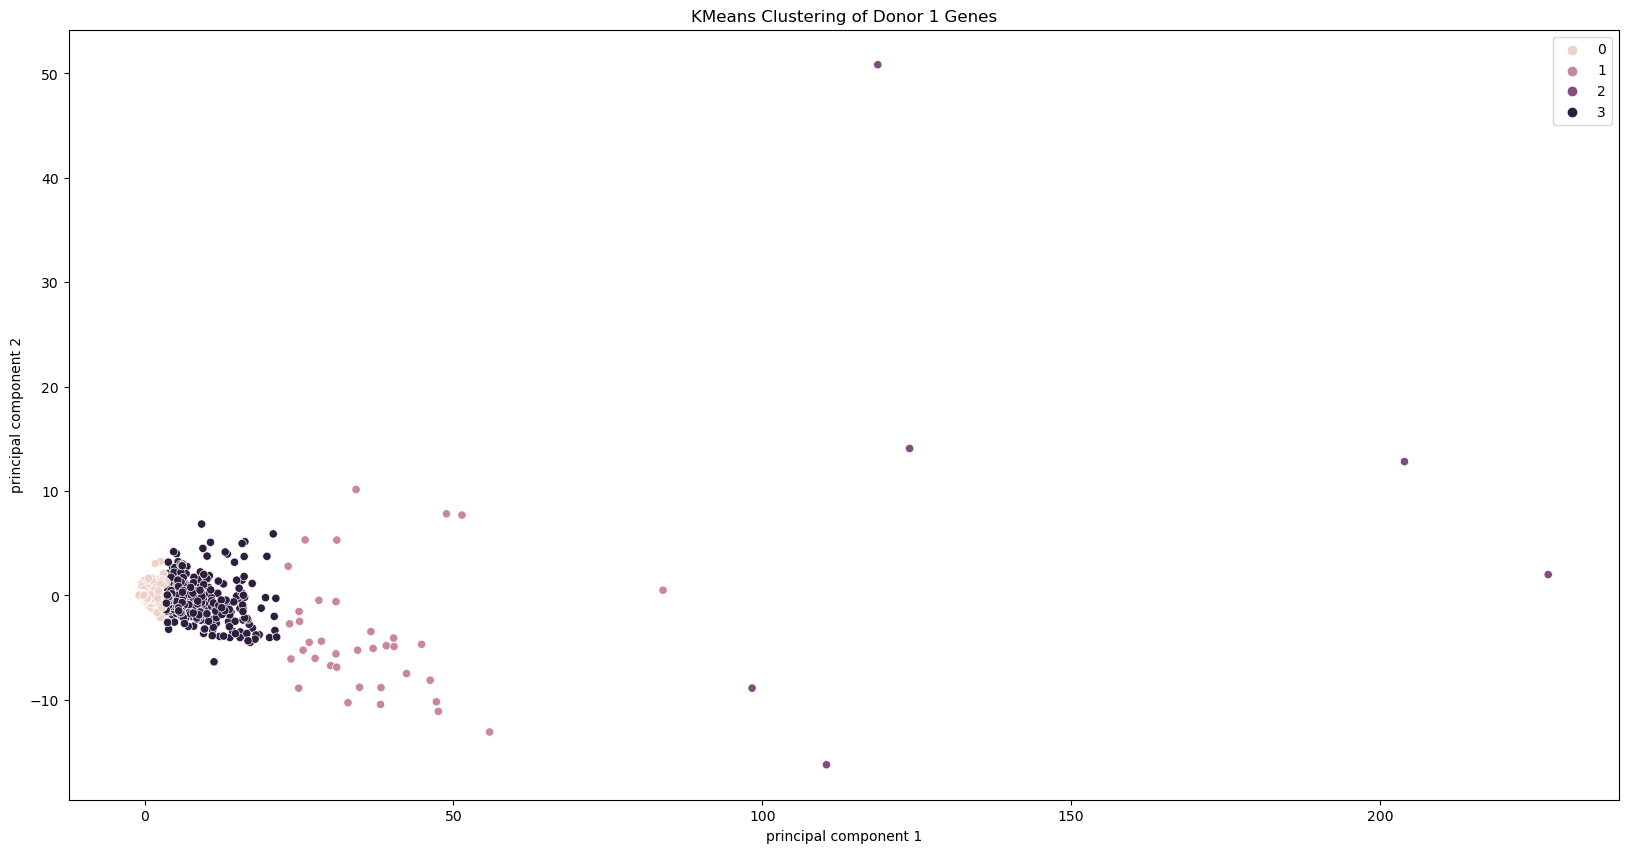

In [17]:
km4 = KMeans(n_clusters=4, random_state=0) 
km4.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km4.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


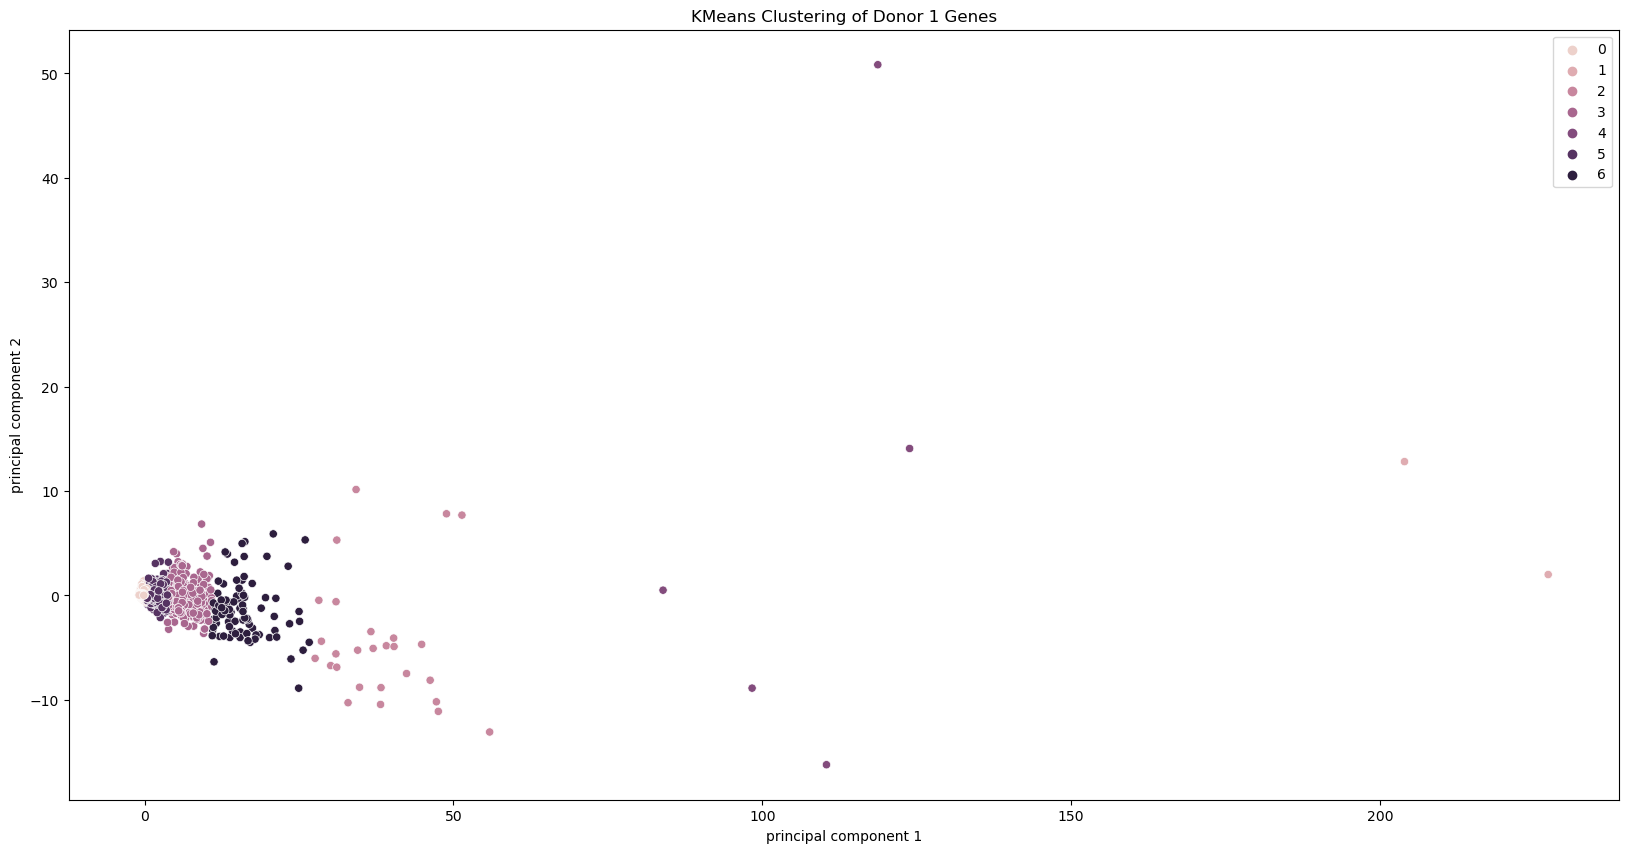

In [18]:
km7 = KMeans(n_clusters=7, random_state=0) 
km7.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km7.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


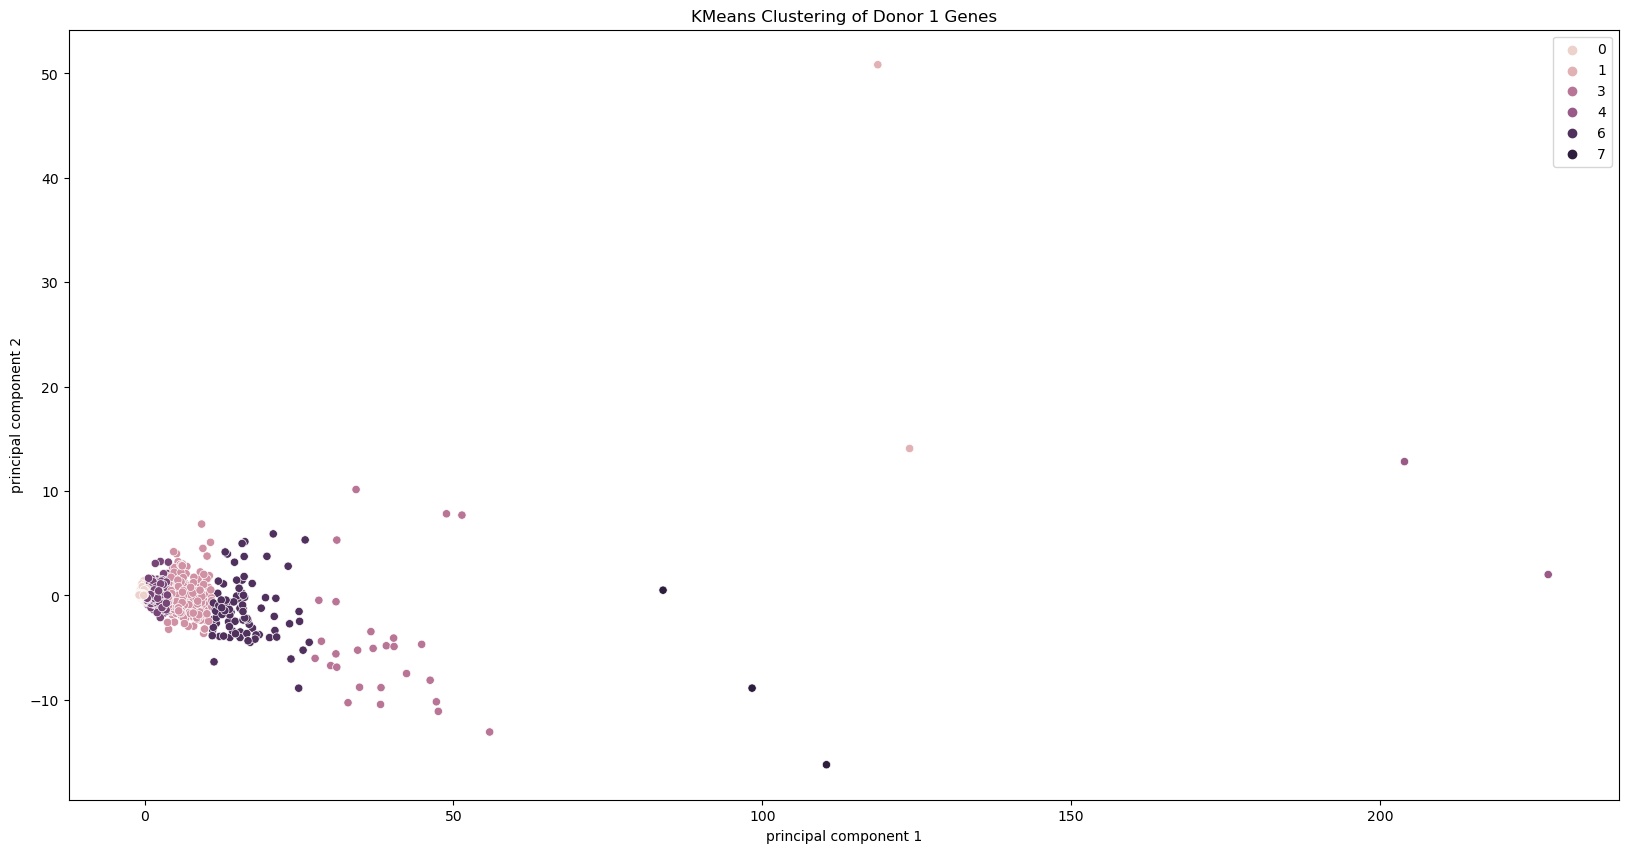

In [19]:
km8 = KMeans(n_clusters=8, random_state=0) 
km8_fit = km8.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km8.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [20]:
#inertias = [km8.inertia_,km7.inertia_,km.inertia_, km5.inertia_, km4.inertia_]
#ks = [8,7,6,5,4]
#k_i = pd.DataFrame({'K': ks,
#     'SSE': inertias
#    })
#k_i

In [21]:
small_df = donor_ex.sample(100)
small_df.head()
#small_df.shape

,occipital neocortex,primary motor-sensory cortex (samples),amygdaloid complex,medial ganglionic eminence,posterior (caudal) superior temporal cortex (area 22c),upper (rostral) rhombic lip,caudal ganglionic eminence,dorsal thalamus,anterior (rostral) cingulate (medial prefrontal) cortex,dorsolateral prefrontal cortex,orbital frontal cortex,lateral ganglionic eminence,"inferolateral temporal cortex (area TEv, area 20)",hippocampus (hippocampal formation),ventrolateral prefrontal cortex,parietal neocortex
ensembl_gene_id,,,,,,,,,,,,,,,,
ENSG00000171401,0.060384,0.046224,0.000000,0.028082,0.110929,0.000000,0.029654,0.000000,0.000000,0.020639,0.000000,0.000000,0.014417,0.000000,0.058833,0.248434
ENSG00000131013,18.667450,14.919673,16.495023,16.385281,14.345446,11.215290,17.554061,17.751112,19.761250,21.369638,21.799236,14.600715,13.177896,18.142422,17.876916,14.370742
ENSG00000122705,60.497021,47.271359,58.977513,52.798474,55.749785,57.482459,50.876593,50.054036,56.943748,66.795514,69.323627,47.536807,51.099195,56.736822,57.099536,52.400230
ENSG00000069018,0.000000,0.011270,0.109215,0.000000,0.023590,0.850452,0.010918,0.012748,0.014137,0.000000,0.086137,0.061676,0.258273,0.011882,0.000000,0.023142
ENSG00000158050,0.316479,0.151343,1.295544,0.225403,1.393916,2.888239,0.274677,0.634762,0.497938,0.455792,1.233725,0.321430,2.660674,0.904020,0.650434,0.325221


In [22]:
# Separating out the features
xdf = small_df.loc[:, features].values

# Separating out the target
ydf = donor_ex_o.loc[:,['geneID']].values

# Standardizing the features
xdf = StandardScaler().fit_transform(x)

In [23]:
principalComponents = pca.fit_transform(xdf)
#principalComponents
pca_smdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_smdf.head()

,principal component 1,principal component 2
0,1.207014,-0.541395
1,-0.890762,0.038357
2,0.843881,-0.407344
3,-0.654088,0.008191
4,-0.689574,-0.015246


In [24]:
#Now do Kmeans clustering on donor_ex
#from sklearn.cluster import KMeans
#wcss_sm = []
#for i in range(1, 20): 
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#    kmeans.fit(pca_smdf) 
#    wcss_sm.append(kmeans.inertia_)

In [25]:
#plt.plot(range(1, 20), wcss_sm)
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS') 
#plt.title("Elbow Plot")
#plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


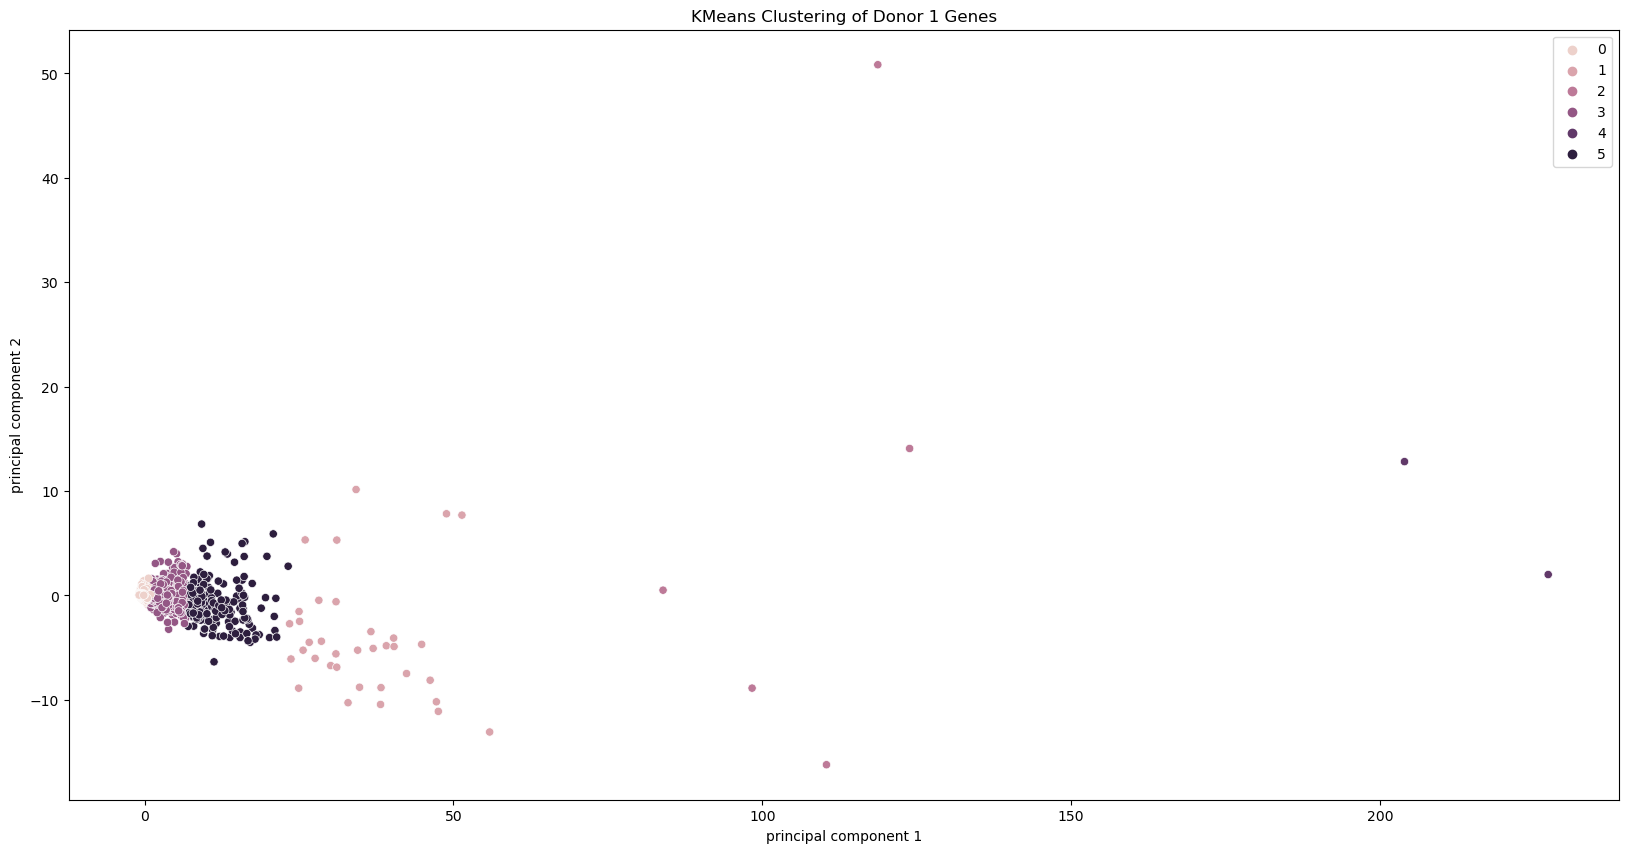

In [26]:
ks6 = KMeans(n_clusters=6, random_state=0) 
ks6.fit(pca_smdf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=pca_smdf, x="principal component 1", y="principal component 2", hue=ks6.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [ ]:
ks5_sil = silhouette_score(pca_smdf, ks6.labels_, metric='euclidean', random_state=42)
ks5_sil